# Contents : RFM - Seller Segmentation

## 1. Library Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import datetime as dt
import os

import warnings
warnings.filterwarnings('ignore')

## 2. Font Set

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

In [3]:
pd.options.display.max_columns=None
# pd.options.display.max_rows=10

In [4]:
# 원본 데이터들
path = glob.glob('../PJT_01/NanoDegree_PJT1/1.EDA/data/*.*')
path

['../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_closed_deals_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_customers_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_geolocation_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_marketing_qualified_leads_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_orders_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_order_items_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_order_payments_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_order_reviews_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_products_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_sellers_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\product_category_name_translation.csv']

## 3.데이터 불러오기

In [5]:
# 각각의 데이터셋 import - customer, items, product
df_customers = pd.read_csv('../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_customers_dataset.csv')
df_orders = pd.read_csv('../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_orders_dataset.csv')
df_items = pd.read_csv('../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_order_items_dataset.csv')
df_sellers = pd.read_csv( '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_sellers_dataset.csv')
df_products = pd.read_csv('../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_products_dataset.csv')


## 4. 데이터셋 병합

In [6]:
df = df_orders.merge(df_customers, on = 'customer_id', how = 'left')
df = df.merge(df_items, on  = 'order_id', how = 'outer')
df = df.merge(df_sellers, on  = 'seller_id', how = 'outer')
df = df.merge(df_products, on = 'product_id', how = 'outer')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350.0,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,13660.0,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0
113421,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00,78a159045124eb7601951b917a42034f,89111,gaspar,SC,1.0,241a1ffc9cf969b27de6e72301020268,8501d82f68d23148b6d78bb7c4a42037,2017-03-16 19:51:36,19.70,10.96,89031.0,blumenau,SC,automotivo,48.0,260.0,2.0,400.0,16.0,4.0,11.0
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,13478.0,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-0

## 5. 데이터 확인

In [7]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
seller_zip_code_prefix            775
seller_city                       775
seller_state                      775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_leng

In [8]:
df[df['order_item_id'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
48292,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48293,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48294,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48295,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48296,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49062,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49063,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49064,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49065,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 6. 데이터 전처리
### 주문형태(df['order_status]에서 이용불가(unavailable), 취소(canceled)제외) => 실적 산정위해서

In [12]:
seller_vaild  = df[~ df['order_status'].str.contains('unavailable') & ~ df['order_status'].str.contains('canceled')]
seller_vaild 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350.0,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,13660.0,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,13478.0,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05

In [13]:
seller_vaild.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  20
order_delivered_carrier_date      728
order_delivered_customer_date    1920
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       8
product_id                          8
seller_id                           8
shipping_limit_date                 8
price                               8
freight_value                       8
seller_zip_code_prefix              8
seller_city                         8
seller_state                        8
product_category_name            1597
product_name_lenght              1597
product_description_lenght       1597
product_photos_qty               1597
product_weight_g                   26
product_leng

### 필요한 컬럼만 지정

In [14]:
seller_vaild[seller_vaild['seller_id'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
48349,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00,55fbb57fd54c35a38c80c2a032a6ca6e,15300,general salgado,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48366,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00,2e015e68fbfa36910263df5384e8e45c,73401,brasilia,DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48459,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00,355862aa14375fe3950ee04fef9c7a53,22621,rio de janeiro,RJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48471,a68ce1686d536ca72bd2dadc4b8671e5,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaN,2016-12-01 00:00:00,f15a952dfc52308d0361288fbf42c7b3,91250,porto alegre,RS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48721,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00,10d5890ed5e7ec78a7db23b5ac579b17,93025,sao leopoldo,RS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48740,2ce9683175cdab7d1c95bcbb3e36f478,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,2016-10-06 07:46:39,NaN,NaN,2016-11-25 00:00:00,6a2da481aa7827b951175772a0fe8bb8,16012,aracatuba,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48745,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00,161e5b2b4513edb336986a8909218365,87720,paranavai,PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48830,e04f1da1f48bf2bbffcf57b9824f76e1,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05 13:22:20,2016-10-06 15:51:38,NaN,NaN,2016-11-29 00:00:00,8886115442775dd8a20c2dcc921c7cc8,88070,florianopolis,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
real_s_valid = seller_vaild[seller_vaild['seller_id'].notnull()]
real_s_valid

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350.0,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,13660.0,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,13478.0,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05

In [16]:
real_s_valid.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      721
order_delivered_customer_date    1912
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
product_category_name            1589
product_name_lenght              1589
product_description_lenght       1589
product_photos_qty               1589
product_weight_g                   18
product_leng

In [17]:
# 필요컬럼 지정 
real_s_valid.iloc[ : , :22]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350.0,maua,SP,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350.0,maua,SP,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350.0,maua,SP,utilidades_domesticas
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350.0,maua,SP,bebes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,13660.0,porto ferreira,SP,construcao_ferramentas_iluminacao
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,13478.0,americana,SP,moveis_decoracao
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,e55e436481078787e32349cee9febf5e,39803,teofilo otoni,MG,1.0,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,2018-05-28 21:31:24,219.90,24.12,8320.0,sao paulo,SP,moveis_decoracao


In [18]:
real_s_valid['order_id'].nunique()

98199

In [19]:
real_s_valid['customer_id'].nunique()

98199

In [21]:
# 그렇다면 셀러별로 판매 빈도수 측정해보기 
real_s_valid['seller_id'].value_counts().head(30)
# 2025명의 고객에게 판매한 셀러가 1등 

6560211a19b47992c3666cc44a7e94c0    2025
4a3ca9315b744ce9f8e9374361493884    1985
1f50f920176fa81dab994f9023523100    1930
cc419e0650a3c5ba77189a1882b7556a    1766
da8622b14eb17ae2831f4ac5b9dab84a    1551
955fee9216a65b617aa5c0531780ce60    1498
1025f0e2d44d7041d6cf58b6550e0bfa    1428
7c67e1448b00f6e969d365cea6b010ab    1364
ea8482cd71df3c1969d7b9473ff13abc    1202
7a67c85e85bb2ce8582c35f2203ad736    1170
4869f7a5dfa277a7dca6462dcf3b52b2    1155
3d871de0142ce09b7081e2b9d1733cb1    1143
8b321bb669392f5163d04c59e235e066    1018
cca3071e3e9bb7d12640c9fbe2301306     829
620c87c171fb2a6dd6e8bb4dec959fc6     789
a1043bafd471dff536d0c462352beb48     767
e9779976487b77c6d4ac45f75ec7afe9     749
f8db351d8c4c4c22c6835c19a46f01b0     723
d2374cbcbb3ca4ab1086534108cc3ab7     630
391fc6631aebcf3004804e51b40bcf1e     613
fa1c13f2614d7b5c4749cbc52fecda94     585
7d13fca15225358621be4086e1eb0964     578
128639473a139ac0f3e5f5ade55873a5     560
1835b56ce799e6a4dc4eddc053f04066     558
46dc3b2cc0980fb8

In [22]:
real_s_valid['order_item_id'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6., 11., 10.,  7.,  8.,  9., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

In [23]:
real_s_valid[real_s_valid['product_id'].str.contains('710e8b076db06c8e5343a9e23f0e3d83')]
# order_item_id 는 주문 한개당 구매한 상품 번호임 
# 하단 예시는 주문 하나에 상품을 두개 구매했다는거임. 중복값이 아니라는것을 암시하는 컬럼 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
113416,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,1.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0


In [24]:
# row하나당 하나의 주문 Quantity를 1로 잡는다.
real_s_valid['Quantity'] = 1
real_s_valid

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Quantity
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350.0,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0,1
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,13660.0,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0,1
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,13478.0,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0,1
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11

In [25]:
# totalprice = Quantity * price
real_s_valid['totalprice'] = real_s_valid['Quantity'] * real_s_valid['price']

### 이상치 확인

In [26]:
real_s_valid['totalprice'].describe()
# 평균 120헤알 
# 최댓값이 6735..?

count    112101.000000
mean        120.377166
std         182.637401
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: totalprice, dtype: float64

In [27]:
real_s_valid[real_s_valid['totalprice'] > 6700]
# 진짜 있긴 있네... 뭐냐 저거 .... 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Quantity,totalprice
111068,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,1.0,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,1,6735.0
111631,fefacc66af859508bf1a7934eab1e97f,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,459bef486812aa25204be022145caa62,29066,vitoria,ES,1.0,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,1,6729.0


### 중복데이터 제거

In [28]:
print(real_s_valid.shape)
copy = real_s_valid.drop_duplicates().copy()
copy.shape

(112101, 31)


(112101, 31)

## 7. RFM계산

In [29]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112101 entries, 0 to 113424
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112101 non-null  object 
 1   customer_id                    112101 non-null  object 
 2   order_status                   112101 non-null  object 
 3   order_purchase_timestamp       112101 non-null  object 
 4   order_approved_at              112086 non-null  object 
 5   order_delivered_carrier_date   111380 non-null  object 
 6   order_delivered_customer_date  110189 non-null  object 
 7   order_estimated_delivery_date  112101 non-null  object 
 8   customer_unique_id             112101 non-null  object 
 9   customer_zip_code_prefix       112101 non-null  int64  
 10  customer_city                  112101 non-null  object 
 11  customer_state                 112101 non-null  object 
 12  order_item_id                 

In [30]:
copy.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'Quantity', 'totalprice'],
      dtype='object')

In [31]:
# order_purchase_timestamp 형변환-> 고객의 구매 일자이면서 셀러의 판매일자  
copy['order_purchase_timestamp'] = pd.to_datetime(copy['order_purchase_timestamp'])

In [32]:
# Recency 계산을 위해 해당 주문에서 가장 최근 구매가 일어난 시간을 가져옵니다.
# 최근 거래 기준일(last_timestamp)을 만들기 위해 timedelta로 날짜를 더해줍니다.(최소값:1 설정) 
last_timestamp = copy['order_purchase_timestamp'].max() + dt.timedelta(days = 1)
last_timestamp

Timestamp('2018-09-04 09:06:57')

### 셀러별 Recency, Frequency, Monetary 값 구하기
- Recency : 최근 거래 기준일(last_timestamp)과 셀러별 최근 판매한 날짜(x.max())와 차이값
- Frequency : 구매 빈도수
- Monetary : 총 구매 금액

In [33]:
rfm = copy.groupby(['seller_id']).agg({'order_purchase_timestamp' : lambda x : (last_timestamp - x.max()).days,
                                                 'order_id' : 'count',
                                                'totalprice' : 'sum'})
rfm.shape

(3053, 3)

In [34]:
rfm

,order_purchase_timestamp,order_id,totalprice
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03
002100f778ceb8431b7a1020ff7ab48f,144,55,1234.50
003554e2dce176b5555353e4f3555ac8,263,1,120.00
004c9cd9d87a3c30c522c48c4fc07416,123,170,19712.71
...,...,...,...
ffc470761de7d0232558ba5e786e57b7,17,31,1649.01
ffdd9f82b9a447f6f8d4b91554cc7dd3,15,20,2101.20
ffeee66ac5d5a62fe688b9d26f83f534,113,14,1839.86


In [35]:
rfm.rename(columns = {'order_purchase_timestamp' : 'Recency', 
                      'order_id' : 'Frequency', 
                      'totalprice': 'MonetaryValue'},
            inplace = True)
rfm

,Recency,Frequency,MonetaryValue
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03
002100f778ceb8431b7a1020ff7ab48f,144,55,1234.50
003554e2dce176b5555353e4f3555ac8,263,1,120.00
004c9cd9d87a3c30c522c48c4fc07416,123,170,19712.71
...,...,...,...
ffc470761de7d0232558ba5e786e57b7,17,31,1649.01
ffdd9f82b9a447f6f8d4b91554cc7dd3,15,20,2101.20
ffeee66ac5d5a62fe688b9d26f83f534,113,14,1839.86


In [36]:
rfm['Frequency'].unique()

array([   3,  239,   55,    1,  170,   26,  172,  135,    2,    5,   15,
         12,   39,   11,   67,  131,  246,    8,    4,   17,   16,   24,
         30,   44,    6,    9,   13,   94,   88,   51,   28,   98,   22,
         66,   64,   10,   63,   62,   60,   72,   74,   53,  405,   18,
         95,   37,    7,  130,   83,   23,   97,   21,   27,   19,   20,
         56,   14,   25,   78,  210,  146,   31,  177,   73,  220,   40,
         58,  137,  193,  269,   32,   43,   35, 1428,  128,   48,  102,
        560,  134,   85,   38,  410,   36,  149,  129,  266,   61,  558,
         34,  529,  178,  117,   33,  171,   49,  327,  140,   75,   29,
       1930,   79,   54,  425,  194,  148,   80,   46,   52,  166,  165,
         50,  116,   47,  110,  126,   82,  174,   45,  212,   87,   42,
         41,  161,  240,  281,  613,  121,   99,  160, 1143,  101,  229,
        132,  125,  111,  153,   59,  539,   90,  216,  151, 1155, 1985,
        222,  346,  394,   89,  454,   68,   84,  1

In [37]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,3053.000000,3053.000000,3053.000000
mean,140.872257,36.718310,4420.046099
std,167.448257,119.706012,13963.226311
min,1.000000,1.000000,3.500000
25%,18.000000,2.000000,210.000000
50%,51.000000,8.000000,825.000000
75%,222.000000,25.000000,3353.480000
max,700.000000,2025.000000,229237.630000


## 8. RFM모형
* Scoring 기법: RFM의 요인을 각각 5등급으로 등간격으로 분류하는 방법이다.
* 현재 개발된 RFM 모형은 크게 4가지로 분류 할 수 있다. 이 문서의 내용들은 정설이 아니며 신뢰하기 어려움을 전제로 참고해야한다.
    * 모델1. RFM 각 요소의 20% rule의 적용
    * 모델2. 비율 척도에 의한 양적인 정도의 차이에 따른 등간격의 5등급 분류
    * 모델3. 상하 20%를 제외한 등간격 척도에 의한 그룹 분류
    * 모델4. 군집 분석에 의한 각 요소 별 5개의 그룹 분류
* Q CUT으로 진행 : pd.qcut

In [38]:
# Recency 는 최근일수록 높은 점수
# Frequency, MonetaryValue 는 값이 클 수록 높은 점수
r_scores = list(range(5, 0, -1))
f_scores = list(range(1, 6))
m_scores = list(range(1, 6))
cut_size = 5

In [39]:
rfm.sample(3)

,Recency,Frequency,MonetaryValue
seller_id,,,
8c5e007d7bd5693fa1386ffefbc99f6c,15,24,1029.11
09bad886111255c5b5030314fc7f1a4a,7,5,487.50
25cf099de44674fde97473224f9d59ab,9,50,1654.36


In [40]:
r_cut = pd.qcut(rfm['Recency'], q=cut_size, labels = r_scores)
f_cut = pd.qcut(rfm['Frequency'], q=cut_size, labels = f_scores)
m_cut = pd.qcut(rfm['MonetaryValue'], q=cut_size, labels = m_scores)
# assign 메소드로 여러변수 한번에 만들기 
rfm = rfm.assign(R = r_cut, F = f_cut,  M =  m_cut)

In [41]:
rfm.sample(3)

,Recency,Frequency,MonetaryValue,R,F,M
seller_id,,,,,,
c33a5c3c983090c8b78a28e65052a20d,71,8,559.2,3,3,3
53088c75f948b48a7ece173ac17f0c12,27,3,261.7,4,2,2
2d378dbb39815785238c0139c7647fb7,474,2,1154.0,1,1,3


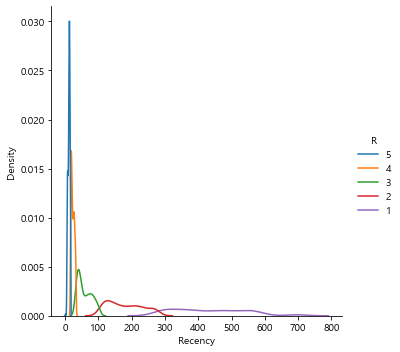

In [51]:

sns.displot(data=rfm, x="Recency", hue="R", kind="kde")
plt.show()

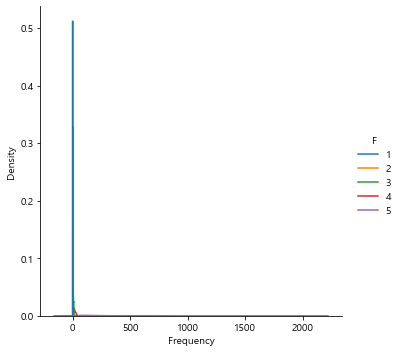

In [55]:
sns.displot(data=rfm, x="Frequency", hue="F", kind="kde")
plt.show()

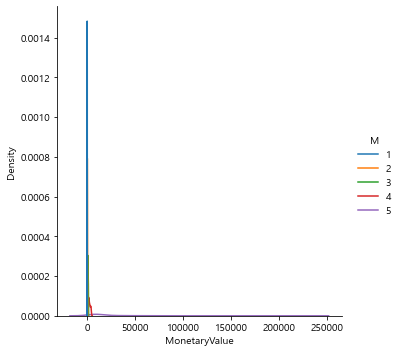

In [54]:
sns.displot(data=rfm, x="MonetaryValue", hue="M", kind="kde")
plt.show()

## 9. RFM Segment

In [56]:
rfm["RFM_segment"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
seller_id,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00,1,2,4,124
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03,3,5,5,355


## 10. RFM Score

In [57]:
# R, F, M 값의 합계를 구해서 세그먼트 점수 구하깅
rfm["RFM_score"]  = rfm[["R", "F", "M"]].sum(axis=1)
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
seller_id,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00,1,2,4,124,7
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03,3,5,5,355,13


<AxesSubplot:xlabel='RFM_segment', ylabel='RFM_score'>

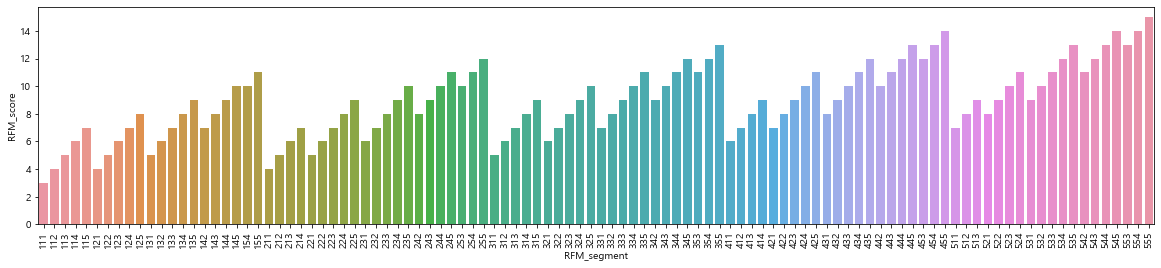

In [58]:
# RFM segment 값에 따라 정렬합니다.
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values("RFM_segment"), x="RFM_segment", y="RFM_score")

In [59]:
score_rfm = rfm.groupby(["RFM_score"]).agg({"Recency" : "mean", 
                                "Frequency" : "mean", 
                                "MonetaryValue" : ["sum", "mean"]})
score_rfm.style.background_gradient().format("{:,.0f}")

## 11.q-cut - 3 (silver, gold, platinum)

In [60]:
# qcut 을 통해 3단계로 "silver", "gold", "platinum" 셀러등급 지정
rfm["RFM_class"] = pd.qcut(rfm["RFM_score"], q=3, labels=["silver", "gold", "platinum"])
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
seller_id,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00,1,2,4,124,7,silver
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03,3,5,5,355,13,platinum
002100f778ceb8431b7a1020ff7ab48f,144,55,1234.50,2,5,3,253,10,gold
003554e2dce176b5555353e4f3555ac8,263,1,120.00,2,1,1,211,4,silver
004c9cd9d87a3c30c522c48c4fc07416,123,170,19712.71,2,5,5,255,12,platinum


In [61]:
# "RFM_class" 별로 그룹화 하고 "RFM_score" 의 describe 값을 구합니다.
rfm.groupby("RFM_class")["RFM_score"].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,1189.0,5.119428,1.386273,3.0,4.0,5.0,6.0,7.0
gold,991.0,9.487386,1.121684,8.0,8.0,9.0,10.0,11.0
platinum,873.0,13.460481,1.148836,12.0,12.0,13.0,15.0,15.0


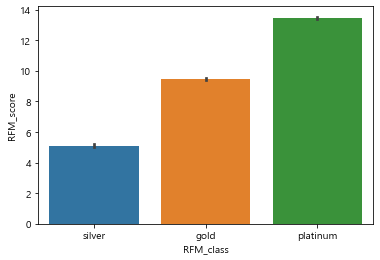

In [63]:
# barplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.barplot(data=rfm, x="RFM_class", y="RFM_score")
plt.show()

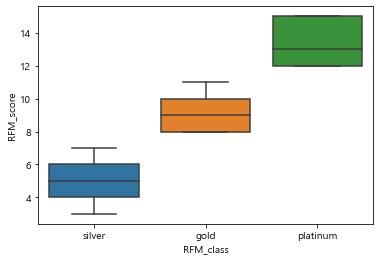

In [64]:
# boxplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")
plt.show()

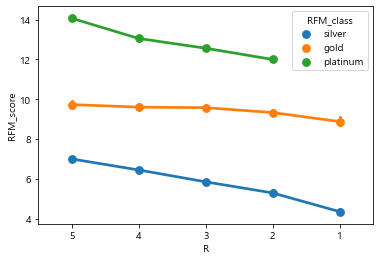

In [65]:
sns.pointplot(data=rfm, x="R", y="RFM_score", hue="RFM_class")
plt.show()

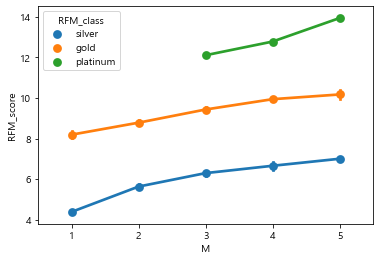

In [66]:
sns.pointplot(data=rfm, x="M", y="RFM_score", hue="RFM_class")
plt.show()

In [67]:
# "RFM_class" 별로 그룹화합니다.
# "Recency", "Frequency" 의 평균을 구합니다.
# "MonetaryValue"의 "mean", "sum", "count" 값을 구합니다.
rfm_agg = rfm.groupby("RFM_class").agg({"Recency": "mean", 
                              "Frequency": "mean",
                             "MonetaryValue": ["mean", "sum", "count" ]})

In [68]:
rfm_agg.style.background_gradient()

In [69]:
rfm_agg.astype(int).style.format("{:,}")

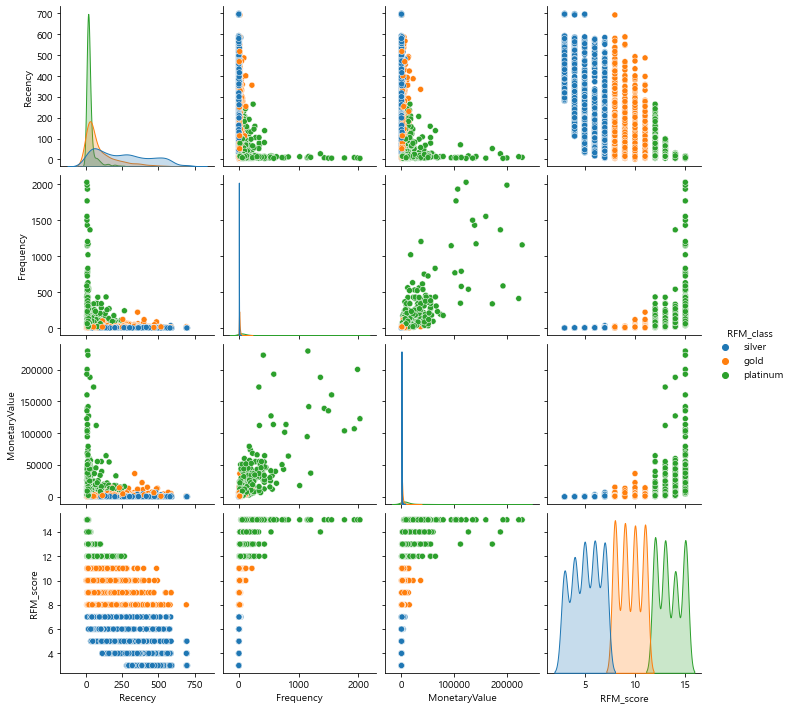

In [70]:
sns.pairplot(rfm, hue = "RFM_class" )
plt.show()

In [71]:
corr = rfm.corr()
corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.174595,-0.165596,-0.644770
Frequency,-0.174595,1.000000,0.796501,0.390004
MonetaryValue,-0.165596,0.796501,1.000000,0.386555
RFM_score,-0.644770,0.390004,0.386555,1.000000


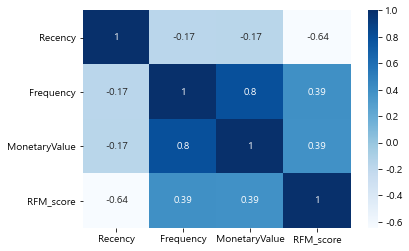

In [76]:
sns.heatmap(corr, 
            cmap = "Blues", 
            annot = True)
plt.show()

In [73]:
np.ones_like(corr)
mask = np.triu(np.ones_like(corr)) #마스킹 할 부분은 대각선 위에 부분이라는 명령어 
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

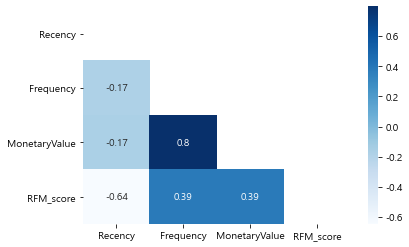

In [75]:
sns.heatmap(corr, cmap = "Blues", 
            annot = True, 
            mask = mask)
plt.show()

## 12.q-cut - 5 (Bronze, silver, gold, platinum, Diamond) 

In [77]:
# qcut 을 통해 3단계로 "silver", "gold", "platinum" 셀러등급 지정
rfm["RFM_class"] = pd.qcut(rfm["RFM_score"], q=5, labels=['bronze', "silver", "gold", "platinum", 'diamond'])
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
seller_id,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00,1,2,4,124,7,silver
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03,3,5,5,355,13,platinum
002100f778ceb8431b7a1020ff7ab48f,144,55,1234.50,2,5,3,253,10,gold
003554e2dce176b5555353e4f3555ac8,263,1,120.00,2,1,1,211,4,bronze
004c9cd9d87a3c30c522c48c4fc07416,123,170,19712.71,2,5,5,255,12,platinum


In [78]:
# "RFM_class" 별로 그룹화 하고 "RFM_score" 의 describe 값을 구합니다.
rfm.groupby("RFM_class")["RFM_score"].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
bronze,678.0,4.079646,0.815017,3.0,3.0,4.0,5.0,5.0
silver,764.0,6.996073,0.816755,6.0,6.0,7.0,8.0,8.0
gold,492.0,9.495935,0.500492,9.0,9.0,9.0,10.0,10.0
platinum,712.0,11.977528,0.817908,11.0,11.0,12.0,13.0,13.0
diamond,407.0,14.567568,0.496023,14.0,14.0,15.0,15.0,15.0


In [91]:
rfm['RFM_class'].value_counts()

silver      764
platinum    712
bronze      678
gold        492
diamond     407
Name: RFM_class, dtype: int64

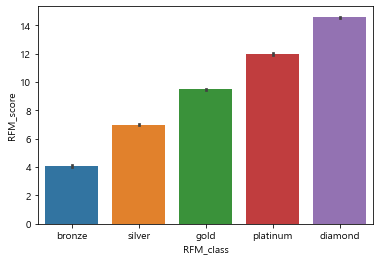

In [79]:
# barplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.barplot(data=rfm, x="RFM_class", y="RFM_score")
plt.show()

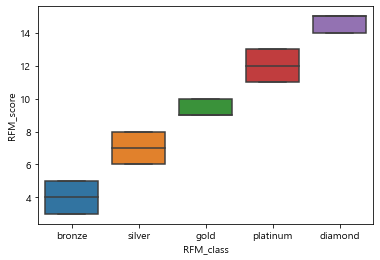

In [80]:
# boxplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")
plt.show()

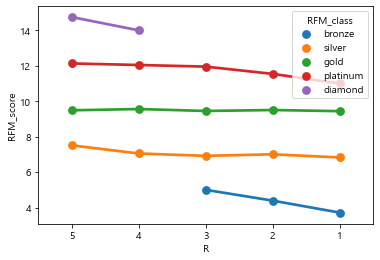

In [81]:
sns.pointplot(data=rfm, x="R", y="RFM_score", hue="RFM_class")
plt.show()

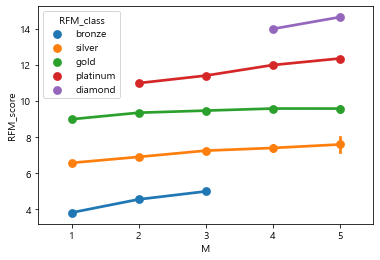

In [82]:
sns.pointplot(data=rfm, x="M", y="RFM_score", hue="RFM_class")
plt.show()

In [83]:
# "RFM_class" 별로 그룹화합니다.
# "Recency", "Frequency" 의 평균을 구합니다.
# "MonetaryValue"의 "mean", "sum", "count" 값을 구합니다.
rfm_agg = rfm.groupby("RFM_class").agg({"Recency": "mean", 
                              "Frequency": "mean",
                             "MonetaryValue": ["mean", "sum", "count" ]})

In [84]:
rfm_agg.style.background_gradient()

In [85]:
rfm_agg.astype(int).style.format("{:,}")

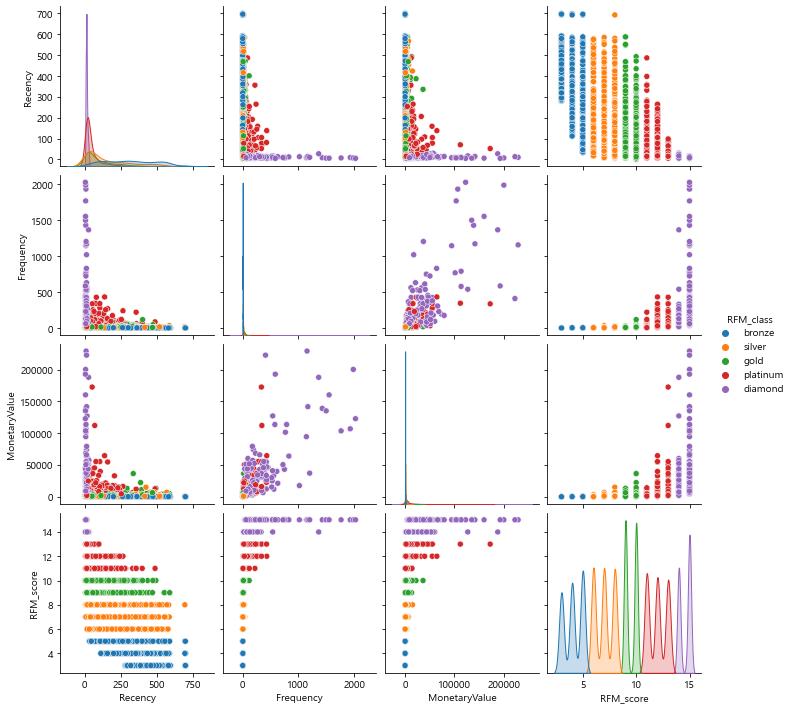

In [86]:
sns.pairplot(rfm, hue = "RFM_class" )
plt.show()

In [87]:
corr = rfm.corr()
corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.174595,-0.165596,-0.644770
Frequency,-0.174595,1.000000,0.796501,0.390004
MonetaryValue,-0.165596,0.796501,1.000000,0.386555
RFM_score,-0.644770,0.390004,0.386555,1.000000


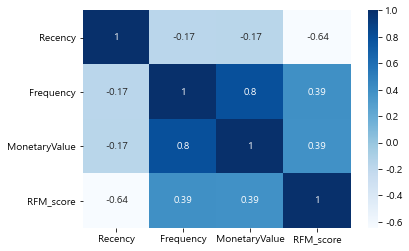

In [88]:
sns.heatmap(corr, 
            cmap = "Blues", 
            annot = True)
plt.show()

In [89]:
np.ones_like(corr)
mask = np.triu(np.ones_like(corr)) #마스킹 할 부분은 대각선 위에 부분이라는 명령어 
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

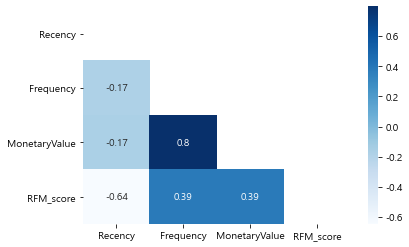

In [90]:
sns.heatmap(corr, cmap = "Blues", 
            annot = True, 
            mask = mask)
plt.show()

### 매출비중

In [93]:
d_c = rfm[rfm['RFM_class'].str.contains('diamond')]
d_c

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
seller_id,,,,,,,,,
00ee68308b45bc5e2660cd833c3f81cc,25,172,20260.00,4,5,5,455,14,diamond
0176f73cc1195f367f7b32db1e5b3aa8,21,39,4733.10,4,5,5,455,14,diamond
01fdefa7697d26ad920e9e0346d4bd1b,14,131,14921.43,5,5,5,555,15,diamond
0241d4d5d36f10f80c644447315af0bd,6,246,31397.70,5,5,5,555,15,diamond
02ecc2a19303f05e59ce133fd923fff7,13,24,5264.19,5,4,5,545,14,diamond
...,...,...,...,...,...,...,...,...,...
fe2032dab1a61af8794248c8196565c9,13,306,65959.61,5,5,5,555,15,diamond
febab0275244b9a49a623f0bd613ca2f,17,129,7272.42,4,5,5,455,14,diamond
ff063b022a9a0aab91bad2c9088760b7,14,96,12076.50,5,5,5,555,15,diamond


In [94]:
d_c['MonetaryValue'].sum()/rfm['MonetaryValue'].sum()*100

60.59936500744529